# <font color=green> **AULA PRÁTICA 4**
-----

## Objetivo:
Mostrar como podemos gerar clusters (grupos) pelo método k-means.


## Tópicos:
1. Relembrar quais são os dados do estudo
2. Entendimento do problema de agrupamento e como podemos relacionar ao problema de localização.  
3. Entendimento do algoritmo K-means
5. Como aplicamos K-means no Python e como escolhemos o número de clusters.  

## 4.1 -  Importando os dados

Lembrando que estamos usando a instância toy (de 500 pontos) gerada na aula prática 3

In [2]:
import pandas as pd

In [3]:
# importando o arquivo
df_subinstancia = pd.read_csv('/content/drive/Shareddrives/Disciplina Modelagem/Aulas/Aula 3/cvrp_RJ0_toy1',index_col = 0)

In [4]:
df_subinstancia.head()

,rotas,demandas,latitude,longitude
0,"{'lng': -43.10673388727864, 'lat': -22.9123848...",6,-22.912385,-43.106734
1,"{'lng': -42.95979662438254, 'lat': -22.8193182...",1,-22.819318,-42.959797
2,"{'lng': -43.02744498762085, 'lat': -22.8819123...",4,-22.881912,-43.027445
3,"{'lng': -42.958418030801106, 'lat': -22.832301...",4,-22.832302,-42.958418
4,"{'lng': -43.10236857041057, 'lat': -22.8965692...",8,-22.896569,-43.102369


Text(0, 1, 'Latitude')

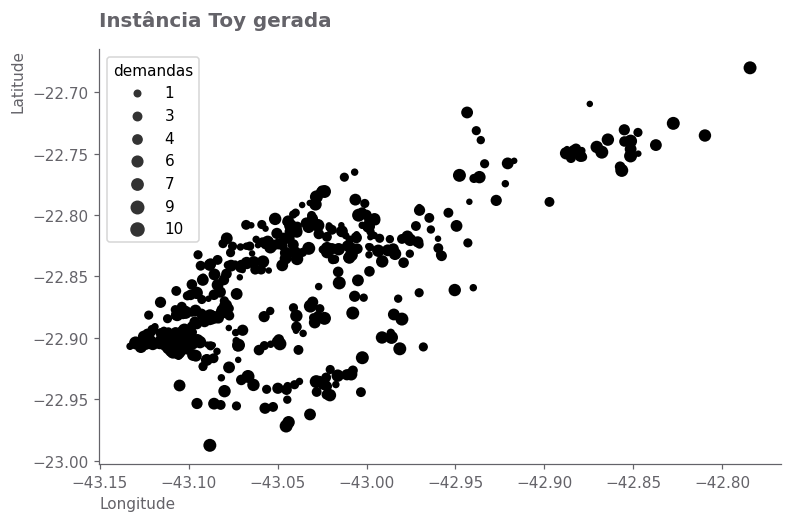

In [5]:
# Gerando gráfico 
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(8,5),       # (largura, altura) em polegadas 
                       dpi=110)                                   # resolução (pontos/polegada)
sns.scatterplot(data = df_subinstancia, x="longitude", y="latitude",  linewidth = 0,  color = 'black',size="demandas", ax = ax)    # cor opcional
ax.set_title('Instância Toy gerada', color = '#646369',loc='left', pad = 15,fontsize=13, weight='bold')
ax.tick_params(axis='both', colors = '#646369',labelsize=10)         # modifica a aparência dos ticks, ticks labels e gridlines
ax.spines['right'].set_visible(False)       # deixa invisível os eixos direito
ax.spines['top'].set_visible(False)         # deixa invisível os eixos superior
ax.spines['bottom'].set_color('#646369')       # inferior
ax.spines['left'].set_color('#646369')         # esquerdo
ax.set_xlabel('Longitude',color='#646369',fontsize=10,
              position=(0, 0), horizontalalignment='left')
ax.set_ylabel('Latitude', color='#646369', fontsize=10,
              position=(0,1), horizontalalignment='right')

Agora queremos dividir nosso problema em regiões. Em cada região, iremos instalar um depósito. Dos depósitos irão sair os veículos que farão a entrega em cada região. Algumas perguntas podem surgir.

  - Quantos depósitos serão necessários?
  - Como dividir as regiões?

## 4.2 -  O problema

### 4.2.1 -  Agrupamento de acordo com critério de minimização da soma das distâncias

Seja **S = {$s_1$, $s_2$,...,$s_m$}** um conjunto de **m** observações pertencentes a um espaço euclideano com **n** dimensões. Essas observações devem ser agrupadas em um determinado número **q** de grupos. Para cada grupo temos um centróide associado,  $x_i$ $\in$ $\mathbf{R}^{nq}$.

Devemos separar o conjunto das **m observações** em **q grupos**, de forma a **minimizar** a soma das distâncias das observações aos centróides do grupo em que estão associadas. Temos um problema de agrupamento (clustering) segundo o critério de minimização da soma de distâncias como um problema do tipo min-sum-min:

$$X^* = {arg min}_{X \in \mathbf{R}^{nq}} {\sum_{j=1}^m {min_i} {|| {s}_j - {x}_i ||}^{2}}$$ 


### 4.2.2 -  Problema de Localização de Fermat-Weber

O problema contínuo da p-mediana (ou Multisource Weber Problem) busca minimizar o custo total de transporte das facilidades às cidades, ponderando o peso específico de cada uma delas.

O  problema é semelhante ao de agrupamento, com a diferença que consideramos as demandas associadas ao ponto de atendimento j por ${w}_j$

Assim, temos:

$$X^* = {arg min}_{X \in \mathbf{R}^{nq}} {\sum_{j=1}^m {w_j} * {min_i} {|| {s}_j - {x}_i ||}^{2}}$$ 

Resumindo,

o **problema de agrupamento** pode ser considerado um **problema de localização da p-mediana** quando consideramos $w_j$ igual a 1.



Como podemos resolver o problema de agrupamento?

<br>

Podemos utilizar um algoritmo simples conhecido como K-means...

### 4.2.3 - K-means

Documentação:

  - https://scikit-learn.org/stable/modules/clustering.html#k-means


Resumindo o K-means:

- Algoritmo de agrupamento do tipo **PARTIÇÃO** que trata o problema segundo o critério de mínima soma de quadrados.

- No algoritmo, ${x_i}$ é o centro de gravidade do grupo i.

- Método iterativo simples para particionar um conjunto de dados em um número de grupos especificado pelo usuário.




 **K-MEANS**

**Fonte:**

https://medium.com/data-folks-indonesia/step-by-step-to-understanding-k-means-clustering-and-implementation-with-sklearn-b55803f519d6



<figure>
<center>
<img src='https://drive.google.com/uc?export=view&id=1dA_ua-euUYUX3eNV1BUAqK9ExwJUFTDx' />
<figcaption>Fluxograma K-means </figcaption></center>
</figure>





## 4.3 -  Resolvendo o problema de geração de clusters por K-means

In [14]:
# Importando pacotes
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

# Funções do sklearn que iremos utilizar
from sklearn.preprocessing import StandardScaler           # Normalização dos dados
from sklearn.cluster import KMeans                          # importando k-means

### 4.3.1 - Normalização dos dados

In [15]:
# Relembrando nosso conjunto de dados...
df_subinstancia.head()

,rotas,demandas,latitude,longitude
0,"{'lng': -43.10673388727864, 'lat': -22.9123848...",6,-22.912385,-43.106734
1,"{'lng': -42.95979662438254, 'lat': -22.8193182...",1,-22.819318,-42.959797
2,"{'lng': -43.02744498762085, 'lat': -22.8819123...",4,-22.881912,-43.027445
3,"{'lng': -42.958418030801106, 'lat': -22.832301...",4,-22.832302,-42.958418
4,"{'lng': -43.10236857041057, 'lat': -22.8965692...",8,-22.896569,-43.102369


Para fazer a clusterização, vamos utilizar as duas últimas colunas (latitude e longitude) que são as variáveis necessárias para fazer o agrupamento.

In [16]:
# Gerando o subconjunto data, que desconsidera as colunas rotas, demandas
data = df_subinstancia.iloc[:, 2:]             
data.head(3)

,latitude,longitude
0,-22.912385,-43.106734
1,-22.819318,-42.959797
2,-22.881912,-43.027445


In [17]:
# Normalização dos dados por StandardScale:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()   # chamando o comando
data1 = sc_x.fit_transform(data)     # normalizando os dados
data1 = pd.DataFrame(data1, columns = data.columns)    # transformando para dataframe
data1.head(3)

,latitude,longitude
0,-0.887659,-0.851741
1,0.825081,1.368802
2,-0.326862,0.346487


### 4.3.2 - Aplicando K-means

#### Decidindo número de clusters

O **número de clusters K** é parâmetro de entrada do K-means. Quando não conhecemos os dados, como podemos fazer para definir esse número? 

Diferentes abordagens podem ser utilizadas para encontrar o número ideal de clusters. O objetivo é encontrar o número mínimo de clusters que particionam com precisão o conjunto dos dados.




Podemos utilizar o método do cotovelo:

  -  A soma da distância quadrada de cada ponto até o centróide do cluster mais próximo (chamada de inércia no scikit-learn) é traçada para um número crescente de clusters.
  -  À medida que o número de clusters aumenta e se ajusta melhor aos dados, o erro diminui.
  - O cotovelo da curva representa o ponto de retornos decrescentes onde o aumento do número de clusters não reduz o erro de forma considerável.

In [18]:
# Importando o pacote
from sklearn.cluster import KMeans

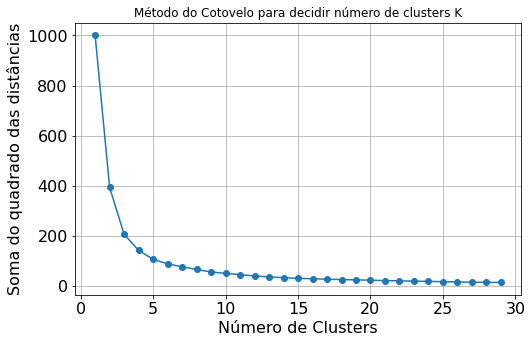

In [19]:
# dados que estamos utilizando: data1

inertias = []       # lista que irá coletar as informações de inércia para cada k
means = []          # lista que guarda os valores de cada k
maxK = 30           # número máximo de k a ser testado

for k in range(1, maxK):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(data1)      # ajustamos o modelo
    means.append(k)                                               # adicionamos o valor de k
    inertias.append(kmeans.inertia_)   # adicionamos o valor da soma do quadrado das distâncias das amostras para seus respectivos centros do cluster mais próximos

plt.figure(figsize=(8,5))   # tamanho da figura
plt.plot(means, inertias, 'o-')
plt.xlabel('Número de Clusters',fontsize=16,color = 'black')
plt.ylabel('Soma do quadrado das distâncias',fontsize=16,color = 'black')
plt.xticks(fontsize=16,color = 'black')
plt.yticks(fontsize=16,color = 'black')
plt.title('Método do Cotovelo para decidir número de clusters K')
plt.grid(b='on')

Pelo método do cotovelo, vemos que 5 é um bom número de clusters.

#### Aplicando K-means com os 5 clusters

In [20]:
# quais dados estamos trabalhando?
data1.head()

,latitude,longitude
0,-0.887659,-0.851741
1,0.825081,1.368802
2,-0.326862,0.346487
3,0.586139,1.389635
4,-0.596598,-0.785772


Ajustando os dados data1 com k-means:

In [22]:
kmeans = KMeans(n_clusters=5, random_state=0)         # K-means com 6 clusters
kmeans.fit(data1.loc[:,:])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [23]:
# Adicionando o cluster de cada registro no dataframe original
df_subinstancia['Cluster'] = kmeans.labels_ + 1                   # adicionando cluster que cada registro se encontra no dataframe df_subinstancia

## OBS: Somamos 1 só para termos clusters 1,2,3,4,5. Sem o 1, teríamos os clusters 0,1,2,3 e 4. Então é só por questão de estética mesmo. Não é obrigatório

In [24]:
# Como podemos pegar as métricas dos centróides (latitude e longitude)?
kmeans.cluster_centers_

array([[ 0.56352406, -0.15370335],
       [-0.66209918, -0.81529392],
       [ 0.85523893,  0.7593543 ],
       [ 2.14770648,  2.54643067],
       [-1.10944542,  0.27039823]])

Notar que ainda estamos com os dados normalizados, pois estamos usando data1 que foi normalizada. Como podemos voltar os dados para o formato original?

In [25]:
# volta para o original
sc_x.inverse_transform(kmeans.cluster_centers_) 

array([[-22.83353067, -43.06054348],
       [-22.90012843, -43.1043221 ],
       [-22.8176795 , -43.00012484],
       [-22.74744956, -42.88187083],
       [-22.92443627, -43.03247993]])

In [26]:
# criando um dataframe com essas medidas:
centros = pd.DataFrame(sc_x.inverse_transform(kmeans.cluster_centers_), columns = ['latitude','longitude'])
centros['cluster'] = range(1,6)   # número dos clusters
centros

,latitude,longitude,cluster
0,-22.833531,-43.060543,1
1,-22.900128,-43.104322,2
2,-22.817680,-43.000125,3
3,-22.747450,-42.881871,4
4,-22.924436,-43.032480,5


In [ ]:
# Fazer o gráfico com os clusters

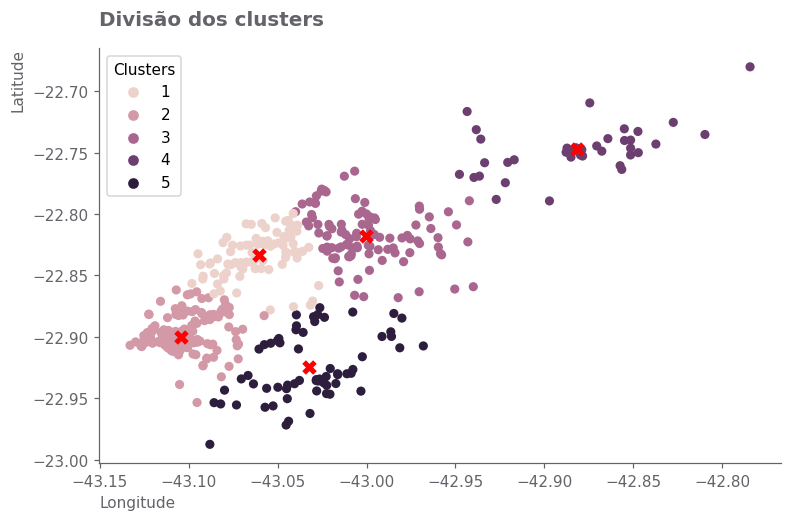

In [27]:
# Importando as Bibliotecas 
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(8,5),       # (largura, altura) em polegadas 
                       dpi=110)                                   # resolução (pontos/polegada)

# pontos:
sns.scatterplot(data = df_subinstancia, x="longitude", y="latitude",  linewidth = 0,  hue = 'Cluster' , ax = ax)    # cor opcional
# clusters:
sns.scatterplot(data = centros, x="longitude", y="latitude",  s = 90, marker="X",linewidth=0, color = 'red' , ax = ax)    # cor opcional

ax.set_title('Divisão dos clusters', color = '#646369',loc='left', pad = 15,fontsize=13, weight='bold')
ax.tick_params(axis='both', colors = '#646369',labelsize=10)         # modifica a aparência dos ticks, ticks labels e gridlines
ax.spines['right'].set_visible(False)       # deixa invisível os eixos direito
ax.spines['top'].set_visible(False)         # deixa invisível os eixos superior
ax.spines['bottom'].set_color('#646369')       # inferior
ax.spines['left'].set_color('#646369')         # esquerdo
ax.set_xlabel('Longitude',color='#646369',fontsize=10,
              position=(0, 0), horizontalalignment='left')
ax.set_ylabel('Latitude', color='#646369', fontsize=10,
              position=(0,1), horizontalalignment='right')

ax.legend(title='Clusters')


In [ ]:
# resposta:
df_subinstancia.head()

,rotas,demandas,latitude,longitude,Cluster
0,"{'lng': -43.10673388727864, 'lat': -22.9123848...",6,-22.912385,-43.106734,2
1,"{'lng': -42.95979662438254, 'lat': -22.8193182...",1,-22.819318,-42.959797,3
2,"{'lng': -43.02744498762085, 'lat': -22.8819123...",4,-22.881912,-43.027445,5
3,"{'lng': -42.958418030801106, 'lat': -22.832301...",4,-22.832302,-42.958418,3
4,"{'lng': -43.10236857041057, 'lat': -22.8965692...",8,-22.896569,-43.102369,2


In [ ]:
# quantidade de pontos por cluster
df_subinstancia['Cluster'].value_counts()

2    216
3    102
1     82
5     63
4     37
Name: Cluster, dtype: int64

Por questão de esforço computacional, iremos escolher 4 clusters para mostrar as próximas etapas.

In [ ]:
df_cluster4 = df_subinstancia.loc[df_subinstancia['Cluster'] == 4,:]
df_cluster4.head()

,rotas,demandas,latitude,longitude,Cluster
15,"{'lng': -42.92705867402125, 'lat': -22.7881124...",7,-22.788112,-42.927059,4
21,"{'lng': -42.827461886756275, 'lat': -22.725373...",10,-22.725374,-42.827462,4
56,"{'lng': -42.89710859232077, 'lat': -22.7893503...",5,-22.789350,-42.897109,4
107,"{'lng': -42.88723394420894, 'lat': -22.7463572...",1,-22.746357,-42.887234,4
145,"{'lng': -42.93574292860143, 'lat': -22.7390110...",3,-22.739011,-42.935743,4


In [ ]:
# num linhas, colunas
df_cluster4.shape

(37, 5)

In [ ]:
# mudando o índice
df_cluster4.index = range(len(df_cluster4))

In [ ]:
df_cluster4.head()

,rotas,demandas,latitude,longitude,Cluster
0,"{'lng': -42.92705867402125, 'lat': -22.7881124...",7,-22.788112,-42.927059,4
1,"{'lng': -42.827461886756275, 'lat': -22.725373...",10,-22.725374,-42.827462,4
2,"{'lng': -42.89710859232077, 'lat': -22.7893503...",5,-22.789350,-42.897109,4
3,"{'lng': -42.88723394420894, 'lat': -22.7463572...",1,-22.746357,-42.887234,4
4,"{'lng': -42.93574292860143, 'lat': -22.7390110...",3,-22.739011,-42.935743,4


Vamos agora adicionar as informações do nosso depósito (a localização do centróide do cluster 4) no nosso dataframe original.

In [ ]:
new = {'rotas': 'origem', 'demandas': np.nan, 'latitude': centros.loc[3,'latitude'], 'longitude': centros.loc[3,'longitude'], 'Cluster': 4}
nova_linha = pd.DataFrame(new,index = [0])
nova_linha

,rotas,demandas,latitude,longitude,Cluster
0,origem,NaN,-22.74745,-42.881871,4


In [ ]:
# adicionando ao dataframe original
df_cluster4_1 = pd.concat([nova_linha,df_cluster4], ignore_index=True)
df_cluster4_1.head()

,rotas,demandas,latitude,longitude,Cluster
0,origem,NaN,-22.747450,-42.881871,4
1,"{'lng': -42.92705867402125, 'lat': -22.7881124...",7.0,-22.788112,-42.927059,4
2,"{'lng': -42.827461886756275, 'lat': -22.725373...",10.0,-22.725374,-42.827462,4
3,"{'lng': -42.89710859232077, 'lat': -22.7893503...",5.0,-22.789350,-42.897109,4
4,"{'lng': -42.88723394420894, 'lat': -22.7463572...",1.0,-22.746357,-42.887234,4


In [ ]:
# Exportando o df_cluster4_1
nome_arquivo = 'cvrp_RJ0_toy1_instancia_cluster4'
salvar1 = '/content/drive/Shareddrives/Disciplina Modelagem/Aulas/Aula 3'
df_cluster4_1.to_csv(salvar1 + '/' + nome_arquivo)